In [33]:
#connect to google drive
from google.colab import drive
drive.mount('/content/drive')
#DO NOT RUN, REPLACE WITH ACTUAL CSV FILE IF RUNNING ON LOCAL MACHINE

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [34]:
#major imports
import pandas
import numpy as np
import sklearn

In [35]:
#import data
df = pandas.read_csv('/content/drive/MyDrive/bodyfat.csv')

In [36]:
df.head()

,Density,BodyFat,Age,Weight,Height,Neck,Chest,Abdomen,Hip,Thigh,Knee,Ankle,Biceps,Forearm,Wrist
0,1.0708,12.3,23,154.25,67.75,36.2,93.1,85.2,94.5,59.0,37.3,21.9,32.0,27.4,17.1
1,1.0853,6.1,22,173.25,72.25,38.5,93.6,83.0,98.7,58.7,37.3,23.4,30.5,28.9,18.2
2,1.0414,25.3,22,154.00,66.25,34.0,95.8,87.9,99.2,59.6,38.9,24.0,28.8,25.2,16.6
3,1.0751,10.4,26,184.75,72.25,37.4,101.8,86.4,101.2,60.1,37.3,22.8,32.4,29.4,18.2
4,1.0340,28.7,24,184.25,71.25,34.4,97.3,100.0,101.9,63.2,42.2,24.0,32.2,27.7,17.7


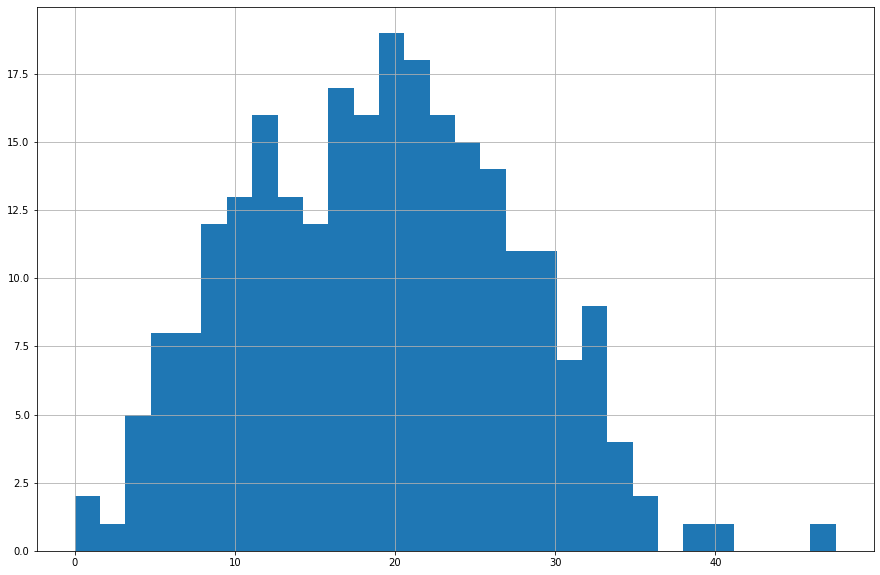

In [37]:
df['BodyFat'].hist(bins=30, figsize=(15, 10))

In [38]:
from sklearn.model_selection import train_test_split
X = df.drop(columns=['BodyFat'])
y = df['BodyFat']

X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.75)

In [39]:
len(y)

252

In [40]:
#baseline linear regression model
from sklearn.linear_model import LinearRegression
lr = LinearRegression()


In [41]:
#20 fold cv
from sklearn.model_selection import cross_val_score
scores = cross_val_score(lr, X, y, cv=20)
print(scores)
print(f"Mean Accuracy: {np.mean(scores)}")
print(f"Std: {np.std(scores)}")

[0.9945235  0.9920098  0.99612867 0.95623739 0.99867024 0.96858177
 0.98245364 0.19916359 0.98543487 0.99529295 0.97511524 0.99754105
 0.99545026 0.99759678 0.9815012  0.99335812 0.99402146 0.99387295
 0.99085995 0.9957109 ]
Mean Accuracy: 0.9491762164444859
Std: 0.1724015910141823


In [42]:
print(X)
print(y)

     Density  Age  Weight  Height  Neck  ...  Knee  Ankle  Biceps  Forearm  Wrist
0     1.0708   23  154.25   67.75  36.2  ...  37.3   21.9    32.0     27.4   17.1
1     1.0853   22  173.25   72.25  38.5  ...  37.3   23.4    30.5     28.9   18.2
2     1.0414   22  154.00   66.25  34.0  ...  38.9   24.0    28.8     25.2   16.6
3     1.0751   26  184.75   72.25  37.4  ...  37.3   22.8    32.4     29.4   18.2
4     1.0340   24  184.25   71.25  34.4  ...  42.2   24.0    32.2     27.7   17.7
..       ...  ...     ...     ...   ...  ...   ...    ...     ...      ...    ...
247   1.0736   70  134.25   67.00  34.9  ...  34.8   21.5    25.6     25.7   18.5
248   1.0236   72  201.00   69.75  40.9  ...  40.8   23.2    35.2     28.6   20.1
249   1.0328   72  186.75   66.00  38.9  ...  37.3   21.5    31.3     27.2   18.0
250   1.0399   72  190.75   70.50  38.9  ...  41.6   22.7    30.5     29.4   19.8
251   1.0271   74  207.50   70.00  40.8  ...  42.2   24.6    33.7     30.0   20.9

[252 rows x 14 

In [43]:
#LOOCV
from sklearn.model_selection import LeaveOneOut
from sklearn.metrics import r2_score, mean_squared_error
from matplotlib import pyplot as plt 
def loocv(X ,y, estimator):
  cv = LeaveOneOut()
  y_true, y_pred = [], []
  for train_idx, test_idx in cv.split(X):
    #print(train_idx)
    #print(test_idx)
    X_train, X_test = X.iloc[train_idx, :].values, X.iloc[test_idx, :].values
    y_train, y_test = y.iloc[train_idx].values, y.iloc[test_idx].values
    estimator.fit(X_train, y_train)
    yhat = estimator.predict(X_test)
    y_true.append(y_test[0])
    y_pred.append(yhat[0])

  
  
  scores = (np.array(y_true) - np.array(y_pred)) ** 2
  hist, bins = np.histogram(scores, bins=30)
  plt.hist(hist, bins=bins)
  plt.show()
  scores_n_outlier = scores[np.where(scores < 50)] #remove outlier MSE
  print(scores[np.where(scores > 50)])

  print("R^2: " + str(r2_score(y_pred, y_true)))
  #print(scores)
  print("MSE(mean): " + str(np.mean(scores)))
  print("MSE(std): " + str(np.std(scores)))
  print("CI (95%): " + str(1.96 * np.std(scores)))

  print("MSE(mean (no outlier)): " + str(np.mean(scores_n_outlier)))
  print("MSE(std (no outlier)): " + str(np.std(scores_n_outlier)))
  print("CI (95%):  " + str(1.96 * np.std(scores_n_outlier)))

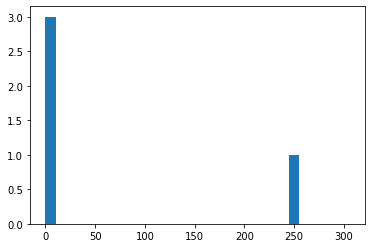

[ 76.03957069 305.85000387]
R^2: 0.972024907871995
MSE(mean): 1.9149040552817538
MSE(std): 19.837370091667278
CI (95%): 38.88124537966787
MSE(mean (no outlier)): 0.402664989478171
MSE(std (no outlier)): 1.702501325422355
CI (95%):  3.336902597827816


In [44]:
loocv(X, y, lr)

In [45]:
#baseline xgboost
from sklearn.ensemble import GradientBoostingRegressor
gb = GradientBoostingRegressor()
scores = cross_val_score(gb, X, y, cv=20)
print(scores)
print(f"Mean Accuracy: {np.mean(scores)}")
print(f"Std: {np.std(scores)}")

[0.95881207 0.97772341 0.99550827 0.93726999 0.99284962 0.95771747
 0.9990637  0.31382878 0.99869747 0.99959958 0.99834461 0.9962259
 0.99319033 0.98380186 0.96534041 0.99874771 0.95781851 0.99816921
 0.99750301 0.99823222]
Mean Accuracy: 0.9509222070499836
Std: 0.1473038571234757


In [46]:
#gridsearchCV
from sklearn.model_selection import GridSearchCV
gbm = GradientBoostingRegressor()
params = {
    'max_depth': [1, 2, 3, 4, 5],
    'n_estimators':[25, 50, 100, 200]
}
search = GridSearchCV(cv=20, param_grid=params, estimator=gbm)
search.fit(X, y)

GridSearchCV(cv=20, estimator=GradientBoostingRegressor(),
             param_grid={'max_depth': [1, 2, 3, 4, 5],
                         'n_estimators': [25, 50, 100, 200]})

In [47]:
search.best_params_

{'max_depth': 2, 'n_estimators': 50}

In [48]:
scores = cross_val_score(search.best_estimator_, X, y, cv=20)
print(scores)
print(f"Mean Accuracy: {np.mean(scores)}")
print(f"Std: {np.std(scores)}")

[0.99082915 0.9937036  0.99378568 0.93865177 0.99857375 0.94156774
 0.99823368 0.35030765 0.99733339 0.99867945 0.99421653 0.99526343
 0.99862936 0.97765776 0.97551347 0.99751311 0.94586198 0.99712309
 0.99905061 0.99662363]
Mean Accuracy: 0.9539559414191618
Std: 0.1398512726637588


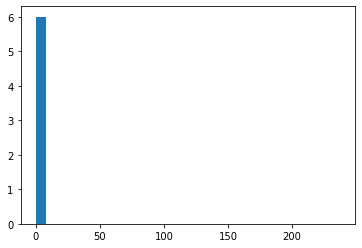

[ 90.29576255 237.52662016  82.82478496]
R^2: 0.9654102882396333
MSE(mean): 2.254168899783787
MSE(std): 17.10962141660393
CI (95%): 33.5348579765437
MSE(mean (no outlier)): 0.6321421489068706
MSE(std (no outlier)): 3.759368546585001
CI (95%):  7.368362351306602


In [49]:
loocv(X, y, search.best_estimator_)

In [50]:
from sklearn.preprocessing import StandardScaler, RobustScaler, Normalizer, MinMaxScaler
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.neighbors import KNeighborsRegressor
from sklearn.decomposition import PCA

pipe = Pipeline([('scaler', MinMaxScaler()), ('knn', KNeighborsRegressor())])
params = {
    'knn__n_neighbors': [1, 3, 5, 7, 9, 11, 13, 15],
    'knn__metric': ['euclidean', 'manhattan', 'minkowski'],
    'knn__weights': ['uniform', 'distance']
}
pipe.get_params().keys()
search = GridSearchCV(cv=20, param_grid=params, estimator=pipe)
search.fit(X, y)

GridSearchCV(cv=20,
             estimator=Pipeline(steps=[('scaler', MinMaxScaler()),
                                       ('knn', KNeighborsRegressor())]),
             param_grid={'knn__metric': ['euclidean', 'manhattan', 'minkowski'],
                         'knn__n_neighbors': [1, 3, 5, 7, 9, 11, 13, 15],
                         'knn__weights': ['uniform', 'distance']})

In [51]:
search.best_params_

{'knn__metric': 'euclidean', 'knn__n_neighbors': 5, 'knn__weights': 'distance'}

In [52]:
scores = cross_val_score(search.best_estimator_, X, y, cv=20)
print(scores)
print(f"Mean Accuracy: {np.mean(scores)}")
print(f"Std: {np.std(scores)}")

[0.64040167 0.75212218 0.89943309 0.92171078 0.88194013 0.82549636
 0.41102288 0.88843762 0.57962876 0.8227252  0.44727527 0.94354819
 0.77100495 0.86735508 0.91434934 0.84994658 0.84020946 0.84588379
 0.83522724 0.74775318]
Mean Accuracy: 0.7842735880167263
Std: 0.147774834044069


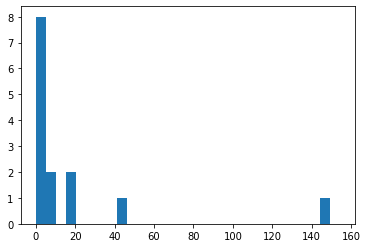

[ 61.83072345  52.20021177  93.76294965 154.43704849]
R^2: 0.8138780610352806
MSE(mean): 8.584853367229837
MSE(std): 14.95129171910962
CI (95%): 29.304531769454854
MSE(mean (no outlier)): 7.262710141824531
MSE(std (no outlier)): 9.553172635096239
CI (95%):  18.724218364788626


In [53]:
loocv(X, y, search.best_estimator_)

In [54]:
from sklearn.ensemble import RandomForestRegressor
rfc = RandomForestRegressor()
params = {
    'max_depth': [1, 2, 3, 4, 5],
    'n_estimators':[10, 25, 50, 100, 200]
}
search = GridSearchCV(cv=20, param_grid=params, estimator=rfc)
search.fit(X, y)


GridSearchCV(cv=20, estimator=RandomForestRegressor(),
             param_grid={'max_depth': [1, 2, 3, 4, 5],
                         'n_estimators': [10, 25, 50, 100, 200]})

In [55]:
search.best_params_

{'max_depth': 5, 'n_estimators': 25}

In [56]:
scores = cross_val_score(search.best_estimator_, X, y, cv=20)
print(scores)
print(f"Mean Accuracy: {np.mean(scores)}")
print(f"Std: {np.std(scores)}")

[0.98286037 0.99769837 0.9891742  0.94102693 0.99936183 0.91446845
 0.99212408 0.44702533 0.99806138 0.99641775 0.99817594 0.96826098
 0.99534958 0.97944737 0.97648384 0.99849677 0.92626702 0.99850658
 0.99837888 0.99588467]
Mean Accuracy: 0.9546735159110252
Std: 0.11904795006074899


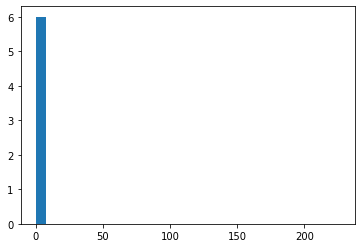

[101.56726643 226.72873646 129.99040178]
R^2: 0.9653750746411524
MSE(mean): 2.3284752788856213
MSE(std): 17.801301436454526
CI (95%): 34.89055081545087
MSE(mean (no outlier)): 0.5160215486084588
MSE(std (no outlier)): 3.1913609311232762
CI (95%):  6.255067425001621


In [57]:
loocv(X, y, search.best_estimator_)

In [58]:
from sklearn.ensemble import ExtraTreesRegressor
ext = ExtraTreesRegressor()
params = {
    'max_depth': [1, 2, 3, 4, 5],
    'n_estimators':[10, 25, 50, 100, 200, 300, 400]
}
search = GridSearchCV(cv=20, param_grid=params, estimator=ext)
search.fit(X, y)

GridSearchCV(cv=20, estimator=ExtraTreesRegressor(),
             param_grid={'max_depth': [1, 2, 3, 4, 5],
                         'n_estimators': [10, 25, 50, 100, 200, 300, 400]})

In [59]:
search.best_params_

{'max_depth': 5, 'n_estimators': 50}

In [60]:
scores = cross_val_score(search.best_estimator_, X, y, cv=20)
print(scores)
print(f"Mean Accuracy: {np.mean(scores)}")
print(f"Std: {np.std(scores)}")

[0.95670047 0.96594567 0.99397507 0.95658595 0.99550896 0.95246584
 0.97988973 0.65295655 0.97202824 0.98158636 0.97014872 0.98996725
 0.97934886 0.97380434 0.98498046 0.97983035 0.92467618 0.98317472
 0.98581744 0.98895236]
Mean Accuracy: 0.9584171755878635
Std: 0.07198421013026272


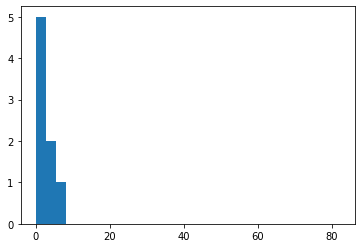

[71.27447812 63.9458957  82.25639608]
R^2: 0.9676740918135232
MSE(mean): 1.8799726587326508
MSE(std): 8.199337743906193
CI (95%): 16.07070197805614
MSE(mean (no outlier)): 1.0292222493530505
MSE(std (no outlier)): 2.5612004709183314
CI (95%):  5.01995292299993


In [61]:
loocv(X, y, search.best_estimator_)

In [62]:
from sklearn.ensemble import AdaBoostRegressor
ada = AdaBoostRegressor()
params = {
    'n_estimators':[10, 25, 50, 100, 200],
    'learning_rate': [0.25, 0.5, 1, 2]
}
search = GridSearchCV(cv=20, param_grid=params, estimator=ada)
search.fit(X, y)

GridSearchCV(cv=20, estimator=AdaBoostRegressor(),
             param_grid={'learning_rate': [0.25, 0.5, 1, 2],
                         'n_estimators': [10, 25, 50, 100, 200]})

In [63]:
search.best_params_

{'learning_rate': 0.25, 'n_estimators': 25}

In [64]:
scores = cross_val_score(search.best_estimator_, X, y, cv=20)
print(scores)
print(f"Mean Accuracy: {np.mean(scores)}")
print(f"Std: {np.std(scores)}")

[0.96761778 0.94134355 0.96732499 0.93528801 0.9906477  0.87770931
 0.97862255 0.52422062 0.97378681 0.9635161  0.97903425 0.97598743
 0.9664517  0.94616978 0.95334868 0.99013764 0.91194568 0.97381196
 0.99260777 0.98495073]
Mean Accuracy: 0.9397261517888177
Std: 0.09924790007716437


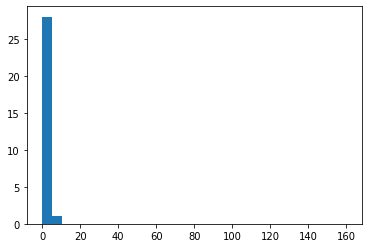

[ 97.456384    57.8911088  160.20326531 123.58027778]
R^2: 0.95007020252998
MSE(mean): 3.185803880776793
MSE(std): 14.874084573617997
CI (95%): 29.153205764291275
MSE(mean (no outlier)): 1.4664981535193666
MSE(std (no outlier)): 4.0111028058832785
CI (95%):  7.861761499531226


In [65]:
loocv(X, y, search.best_estimator_)

In [66]:
from sklearn.tree import DecisionTreeRegressor
dt = DecisionTreeRegressor()
params = {
    'max_depth': [1, 2, 3, 5, 8, None]
}
search = GridSearchCV(cv=20, param_grid=params, estimator=dt)
search.fit(X, y)

GridSearchCV(cv=20, estimator=DecisionTreeRegressor(),
             param_grid={'max_depth': [1, 2, 3, 5, 8, None]})

In [67]:
search.best_params_

{'max_depth': None}

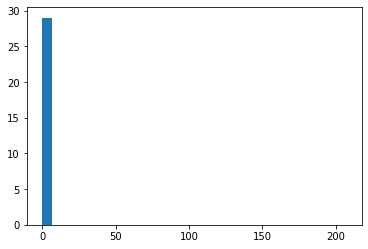

[ 54.76 166.41 207.36  73.96  88.36  54.76]
R^2: 0.9587218833041083
MSE(mean): 2.9448412698412696
MSE(std): 18.820546807084582
CI (95%): 36.88827174188578
MSE(mean (no outlier)): 0.3922357723577237
MSE(std (no outlier)): 2.422663378773539
CI (95%):  4.7484202223961365


In [68]:
loocv(X, y, search.best_estimator_)

In [69]:
scores = cross_val_score(search.best_estimator_, X, y, cv=20)
print(scores)
print(f"Mean Accuracy: {np.mean(scores)}")
print(f"Std: {np.std(scores)}")

[0.75794868 0.9503683  0.96783029 0.9381478  0.99829469 0.96716601
 0.96099197 0.45460113 0.9958344  0.99752635 0.99072383 0.99908757
 0.99660367 0.99083609 0.91060711 0.9991547  0.96560571 0.99845577
 0.99875082 0.9970998 ]
Mean Accuracy: 0.9417817350058384
Std: 0.12401228201873206
